    Classificando exoplanetas potencialmente habitáveis da lista KOI (Kepler Object of Interest)

link: https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=cumulative

documentação das colunas: https://exoplanetarchive.ipac.caltech.edu/docs/API_kepcandidate_columns.html

    KOI's são estrelas observadas pela sonda Kepler onde existem suspeitas de existirem um ou mais exoplanetas no seu respectivo sistema.
    As observações baseiam-se  no trânsito astronômico onde o planeta "passa" entre o observador e sua estrela 
    gerando um escurecimento periódico da estrela. Este escurecimento é um indício da presença de um exoplaneta.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importando os dados

path = r'D:\Python\dataset\kepler.csv'
kepler = pd.read_csv(path, header=53)

kepler.head()

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [3]:
# Informações básicas sobre o número de dados e seus tipos

kepler.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 49 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   kepid              9564 non-null   int64  
 1   kepoi_name         9564 non-null   object 
 2   kepler_name        2671 non-null   object 
 3   koi_disposition    9564 non-null   object 
 4   koi_pdisposition   9564 non-null   object 
 5   koi_score          8054 non-null   float64
 6   koi_fpflag_nt      9564 non-null   int64  
 7   koi_fpflag_ss      9564 non-null   int64  
 8   koi_fpflag_co      9564 non-null   int64  
 9   koi_fpflag_ec      9564 non-null   int64  
 10  koi_period         9564 non-null   float64
 11  koi_period_err1    9110 non-null   float64
 12  koi_period_err2    9110 non-null   float64
 13  koi_time0bk        9564 non-null   float64
 14  koi_time0bk_err1   9110 non-null   float64
 15  koi_time0bk_err2   9110 non-null   float64
 16  koi_impact         9201 

In [4]:
# Contagem de dados faltantes

kepler.isnull().sum()

kepid                   0
kepoi_name              0
kepler_name          6893
koi_disposition         0
koi_pdisposition        0
koi_score            1510
koi_fpflag_nt           0
koi_fpflag_ss           0
koi_fpflag_co           0
koi_fpflag_ec           0
koi_period              0
koi_period_err1       454
koi_period_err2       454
koi_time0bk             0
koi_time0bk_err1      454
koi_time0bk_err2      454
koi_impact            363
koi_impact_err1       454
koi_impact_err2       454
koi_duration            0
koi_duration_err1     454
koi_duration_err2     454
koi_depth             363
koi_depth_err1        454
koi_depth_err2        454
koi_prad              363
koi_prad_err1         363
koi_prad_err2         363
koi_teq               363
koi_teq_err1         9564
koi_teq_err2         9564
koi_insol             321
koi_insol_err1        321
koi_insol_err2        321
koi_model_snr         363
koi_tce_plnt_num      346
koi_tce_delivname     346
koi_steff             363
koi_steff_er

In [5]:
# Dentre os possíveis exoplanetas registrados, selecionamos os exoplanetas confirmados

exop = kepler[kepler['koi_disposition'] == 'CONFIRMED' ]

exop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2669 entries, 0 to 9083
Data columns (total 49 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   kepid              2669 non-null   int64  
 1   kepoi_name         2669 non-null   object 
 2   kepler_name        2669 non-null   object 
 3   koi_disposition    2669 non-null   object 
 4   koi_pdisposition   2669 non-null   object 
 5   koi_score          2652 non-null   float64
 6   koi_fpflag_nt      2669 non-null   int64  
 7   koi_fpflag_ss      2669 non-null   int64  
 8   koi_fpflag_co      2669 non-null   int64  
 9   koi_fpflag_ec      2669 non-null   int64  
 10  koi_period         2669 non-null   float64
 11  koi_period_err1    2666 non-null   float64
 12  koi_period_err2    2666 non-null   float64
 13  koi_time0bk        2669 non-null   float64
 14  koi_time0bk_err1   2666 non-null   float64
 15  koi_time0bk_err2   2666 non-null   float64
 16  koi_impact         2668 

    Segundo o artigo "A Review of the Best Habitable Planet Candidates" de Paul Gilster
link: https://www.centauri-dreams.org/2015/01/30/a-review-of-the-best-habitable-planet-candidates/


  Critérios "chave" para determinar se o exoplaneta é potencialmente habitável:

    - *fluxo estelar efetivo*: (Valor para a Terra é definido como 1)

  Onde o intervalo de zona habitável é aproximadamente (0.36 , 1.11) para sistemas semelhantes ao Sol e Terra.
  
    - *Raio do exoplaneta*:
    
  Estudos citados na revisão apontam que exoplanetas com raio maior que 1.6 vezes o raio da Terra não podem comportar vida


Estes dois critérios fornecem um bom indício da possibilidade do exoplaneta ser habitável.

In [6]:
# Selecionando os exoplanetas que se encaixam nos critérios citados:

candidatos = exop[(exop['koi_insol'] < 1.11) & (exop['koi_insol'] > 0.36) & (exop['koi_prad'] < 1.6)]

# Com isso selecionamos 8 exoplanetas potencialmente habitáveis

candidatos['kepler_name']

2285    Kepler-1652 b
2660    Kepler-1410 b
4636     Kepler-296 f
4766     Kepler-442 b
6016     Kepler-296 e
6020    Kepler-1649 b
6463      Kepler-62 f
9014     Kepler-452 b
Name: kepler_name, dtype: object

In [7]:
# Porcentagem de exoplanetas na zona habitável

hz = exop.loc[(exop['koi_insol'] > 0.36) & (exop['koi_insol'] < 1.11)]
hzp = (hz['koi_insol'].value_counts().sum()/len(exop))*100

print(f'De todos os exoplanetas confirmados, {round(hzp,2)}% estão na zona habitável')

# fee > 1.11 corresponde a altas temperaturas e impossibilidade da existência de
#água na superfície do planeta
# fee < 0.36 corresponde ao valor mínimo para o qual o efeito estufa por C02 é
#capaz de manter a temperatura da superfície do planeta

De todos os exoplanetas confirmados, 1.2% estão na zona habitável


In [8]:
# Porcentagem de planetas com raio menor que 1.6 vezes o raio da Terra

Rp = exop.loc[exop['koi_prad'] < 1.6]
Rpp = (Rp['koi_prad'].value_counts().sum()/len(exop))*100

print(f'De todos os exoplanetas confirmados, {round(Rpp,2)}% tem raios menores que 1.6Rt')

# Planetas com R > 1.6Rt correspondem a planetas com cerca de 4 a 6 vezes a massa da Terra
#existe alta probabilidade de planetas com essa massa serem gasosos. Estes, com excessão
#de casos muito específicos, não abrigam vida.

De todos os exoplanetas confirmados, 28.66% tem raios menores que 1.6Rt


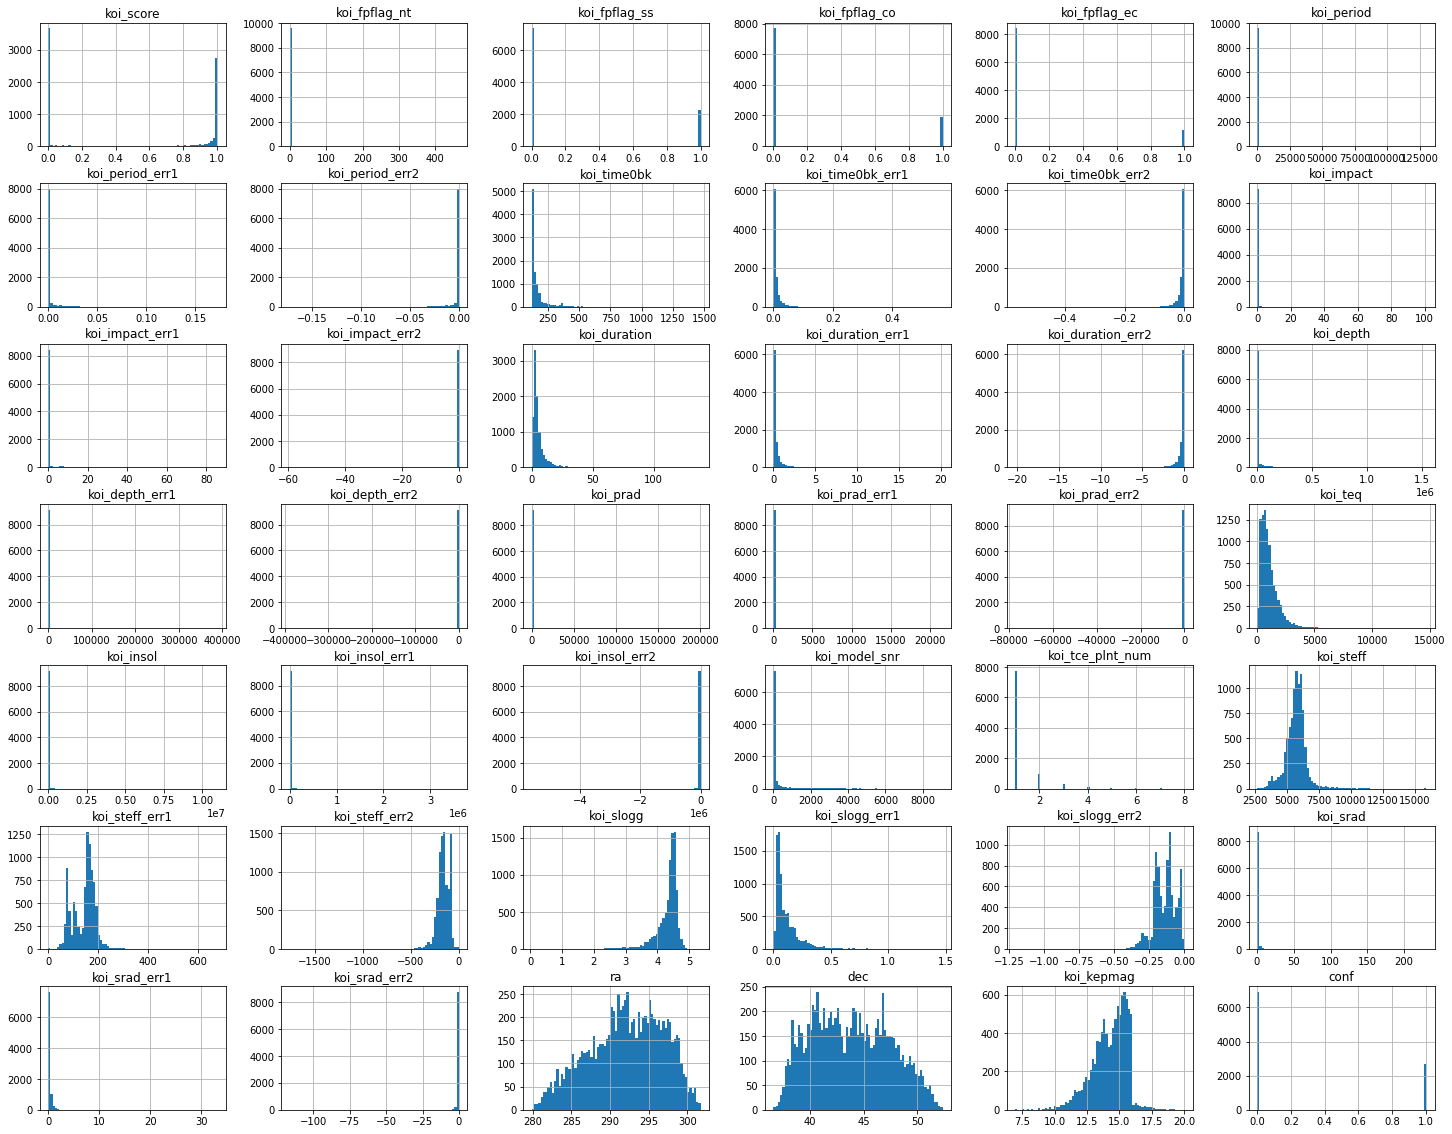

In [12]:
# Observando a distribuição dos dados

kepler_num = kepler.select_dtypes(['float64', 'int64']).drop('kepid', axis=1)

kepler_num['conf'] = (kepler['koi_disposition'] == 'CONFIRMED').astype(int)
kepler_num.drop('koi_teq_err1', axis=1, inplace=True)
kepler_num.drop('koi_teq_err2', axis=1, inplace=True)

kepler_num.hist(bins=75, figsize=(25,20))
plt.show()